### This notebook will focus on Linear Regression. 

In [225]:
#First we import some packages of interest. 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from dmba import regressionSummary

In [226]:
#Let us load our car dataset into the terminal.
car_df = pd.read_csv('ToyotaCorolla.csv')

In [227]:
#Let us just check a few entries. 
car_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [228]:
#Let us just go through the dataset before we apply our linear regression. Check Shape. 
car_df.shape

(1436, 39)

In [229]:
#Check the column names 
car_df.columns.tolist()

['Id',
 'Model',
 'Price',
 'Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'Fuel_Type',
 'HP',
 'Met_Color',
 'Color',
 'Automatic',
 'CC',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Parking_Assistant',
 'Tow_Bar']

In [230]:
#Check the data types.
car_df.dtypes

Id                    int64
Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim        

In [231]:
#Check for any null values in the dataset. 
car_df.isnull().sum()

Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64

### For the sake of this example we will pick a few predictors and then apply the whole correlation framework to find a potential subset of predictors. Don't want to make this thing too long. 

In [232]:
#Pick some random pred and response variables. 
new = ['KM', 'Fuel_Type', 'HP','Automatic', 'Weight','Power_Steering','Price']
pred = ['KM', 'Fuel_Type', 'HP','Automatic', 'Weight','Power_Steering']
response = 'Price'

In [233]:
#Lets now create our new reduced dataset fir predictors 
car_df_new = car_df[new]

In [234]:
#Lets just make sure. Cool
car_df_new.shape

(1436, 7)

In [235]:
#Let us convert the object classes into dummy varibales for later. 
X = pd.get_dummies(car_df_new[pred],drop_first=True)
Y = car_df[response]

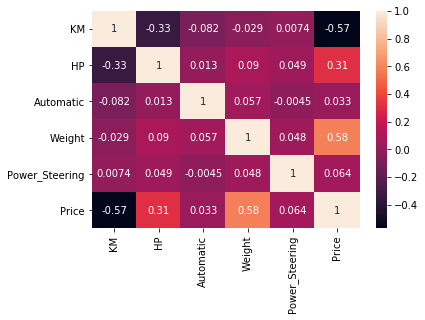

In [236]:
#Let us see what variables are corr with the target or response variable. 
cor = car_df_new.corr()
sns.heatmap(cor,annot=True)

In [237]:
#Now we just subset the corr for values which pass some cutoff. For this example we can just say that cutoff is 0.4
target_cor = abs(cor[response])
pos_cor_target = target_cor[target_cor > 0.4]
pos_cor_target

KM        0.569960
Weight    0.581198
Price     1.000000
Name: Price, dtype: float64

In [238]:
#Want to make sure that KM and weight are not corr to each other. If they were we could drop one and use the other.
#In this case we will use both in the model at the end. 
car_df_new[['KM','Weight']].corr()

,KM,Weight
KM,1.000000,-0.028598
Weight,-0.028598,1.000000


In [239]:
#Okay now we just refine our predictor class to the ones we kinda narrowed down above.
X = X[['KM','Weight']]

In [240]:
#We can now do a train test split for our data set. 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.3,random_state = 10)

In [241]:
#Here we initialize our model and fit it to the data. 
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [242]:
#Print out some values from the model. 
print('intercept ', lr_model.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lr_model.coef_}))

intercept  -26949.05954453803
  Predictor  coefficient
0        KM    -0.052592
1    Weight    38.498296


In [243]:
#I want to just look over the values the model predicts compared to the actual values for the price. Its off but not too insane.
train_pred = lr_model.predict(X_train)
train_pred[0:15].round().tolist()

[8811.0,
 13081.0,
 10423.0,
 8886.0,
 10370.0,
 13511.0,
 9956.0,
 10874.0,
 9624.0,
 11424.0,
 15258.0,
 4842.0,
 5296.0,
 10085.0,
 10521.0]

In [244]:
#Print out the first few values as well for comparison. 
Y_train[0:15].tolist()

[9750,
 16750,
 9650,
 7460,
 10500,
 14950,
 9450,
 10250,
 9895,
 12950,
 18950,
 6750,
 7950,
 9950,
 7950]

In [245]:
#Print out the model score. It isn't the greatest. But still better than no model, gives us a rough ballpark. 
lr_model.score(X_test,Y_test)

0.6375912676199069

Text(0, 0.5, 'Predicted')

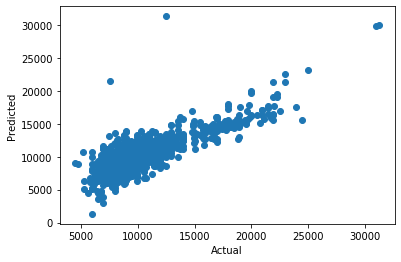

In [246]:
#Lets plot the actual vs predicted to see how it looks. Can see there are some extreme outliers. But the trend seems to be
#somewhat linear. 
plt.scatter(Y_train,lr_model.predict(X_train))
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [247]:
#Gonna use this below. 
Y_predicted = lr_model.predict(X_test)

In [248]:
#Create a datafram to see the results in a neat and tidy format. 
df_view = pd.DataFrame(X_test)
df_view['Real Price'] = Y_test
df_view['Predicted Price'] = Y_predicted

In [250]:
#This can be exported into a csv file if need be. But we can look at the first 10 entries. 
df_view.head(10)

,KM,Weight,Real Price,Predicted Price
995,42750,1050,9950,11225.831842
514,52448,1025,10500,9753.334513
612,154783,1120,7750,8028.641849
307,38932,1040,13500,11041.646197
981,45000,1050,9750,11107.499215
323,36066,1040,11250,11192.375667
494,58745,1035,11950,9807.143899
1275,74151,1050,7250,9574.381702
35,43000,1100,15750,13137.598596
1002,39144,1050,8250,11415.479599


In [167]:
#We can also see how the model preforms with various metrics as given below. 
regressionSummary(Y_test, lr_model.predict(X_test))


Regression statistics

                      Mean Error (ME) : -12.2066
       Root Mean Squared Error (RMSE) : 2274.8381
            Mean Absolute Error (MAE) : 1639.4751
          Mean Percentage Error (MPE) : -4.1471
Mean Absolute Percentage Error (MAPE) : 16.0382


### This completes this little project. 